In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
!curl -fsS http://udon.stacken.kth.se/\~ninjin/comp0090_assignment_1_data.tar.gz -o /tmp/data.tar.gz
!tar -x -z -f /tmp/data.tar.gz
!rm -f /tmp/data.tar.gz

In [4]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [5]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


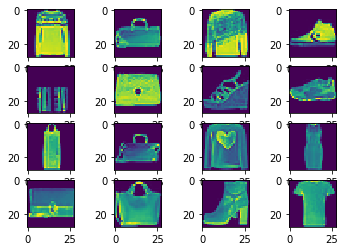

In [6]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

## 2.1 Analytical Gradients

$$                   \mathcal{L} = \frac{1}{n}\displaystyle\sum_{i=1}^{n}{\frac{(y_i -\hat{y_i})^2}{2}}
$$

Given a logistic activation function, let: $$\hat{y} = \sigma(\displaystyle\sum_{i=1}^n w_i x_i + b) = \sigma(\mathbf{x} \cdot \mathbf{w} + b)$$ where $\mathbf{x} \in \mathbb{R}^n, \mathbf{w} \in \mathbb{R}^n, b \in \mathbb{R}$

For a single-layer MLP with k parallel neurons, the weight vectors can be represented collectively as the following weight matrix $\mathbf{W}$:

$$\mathbf{W} = [\mathbf{w_1},...,\mathbf{w_k}] \in \mathbb{R}^{k \times n}$$

and the bias scalars as the following vector $\mathbf{b}$:

$$\mathbf{b} = [b_1,...,b_k] \in \mathbb{R}^k$$

The gradient for $\mathcal{L}$ with respect to the weight matrix is given by:

$$\nabla_{\mathbf{W}}\mathcal{L} = \bigg[\frac{\partial \mathcal{L}}{\partial \mathbf{w_1}},...,\frac{\partial \mathcal{L}}{\partial \mathbf{w_k}} \bigg]^T$$

where the partial derivatives of a scalar wrt a vector are given by:

$$\frac{\partial \mathcal{L}}{\partial \mathbf{w_j}} = \bigg[\frac{\partial \mathcal{L}}{\partial w_1},...,\frac{\partial \mathcal{L}}{\partial w_n}\bigg]^T$$

The gradient for $\mathcal{L}$ with respect to the bias:

$$\nabla_{\mathbf{b}}\mathcal{L} = \bigg[\frac{\partial \mathcal{L}}{\partial b_1},...,\frac{\partial \mathcal{L}}{\partial b_k} \bigg]^T$$

To obtain the partial derivatives, let 

$$z_i = \sum_{i=1}^{n} x_{ij} w_{ij} + b_i$$

where i = 1,...,n and j = 1,...,k

so that

$$\hat{y}_i = \sigma(z_i)$$

Thus, by the chain rule we obtain:

$$\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \times \frac{\partial \hat{y}_i}{\partial z_i} \times \frac{\partial z_i}{\partial w_{ij}} \qquad (1)$$

$$\frac{\partial \mathcal{L}}{\partial b_i} = \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \times \frac{\partial \hat{y}_i}{\partial z_i} \times \frac{\partial z_i}{\partial b_i} \qquad (2)$$

$$\frac{\partial \mathcal{L}}{\partial \hat{y}_i} = \frac{\partial}{\partial \hat{y}_i} \frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{(y_i - \hat{y}_i)^2}{2} = 
\frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{\partial}{\partial \hat{y}_i} \frac{(y_i - \hat{y}_i)^2}{2} = \\
= \frac{1}{n} \displaystyle\sum^{n}_{i=1} \frac{\partial}{\partial \hat{y}_i} \frac{2(y_i - \hat{y}_i)(-1)}{2} =
\frac{1}{n} \displaystyle\sum^{n}_{i=1} \hat{y}_i - y_i \qquad (3)$$

$$\frac{\partial \hat{y}_i}{\partial z_i} = \hat{y}_i(1 - \hat{y}_i) \qquad (4)$$ 

where Eq (4) is given by the derivative of the logistic function: $\sigma(x)' = \sigma(x)(1-\sigma(x)$

$$\frac{\partial z_i}{\partial w_{ij}} = \frac{\partial}{\partial w_{ij}} \sum_{j=1}^{n} x_{ij} w_{ij} + b_i = \sum_{j=1}^{n} \frac{\partial}{\partial w_{ij}} (x_{ij} w_{ij} + b_i) = x_{ij} \qquad (5)$$

$$\frac{\partial z_i}{\partial b_i} = \frac{\partial}{\partial b_i} \sum_{j=1}^{n} x_{ij} w_{ij} + b_i = \sum_{j=1}^{n} \frac{\partial}{\partial b_i} (x_{ij} w_{ij} + b_i) = 1\qquad (6)$$

Substituting the relevant partial derivatives into Eq (1) and (2):
    
$$\frac{\partial \mathcal{L}}{\partial w_{ij}} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (\hat{y}_i - y_i) \hat{y}_i (1 - \hat{y}_i) x_{ij}$$

$$\frac{\partial \mathcal{L}}{\partial b_i} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} (\hat{y}_i - y_i) \hat{y}_i (1 - \hat{y}_i)$$

## 2.2 Verifying Gradients Correctness